In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tools import plot_decision_regions

### data

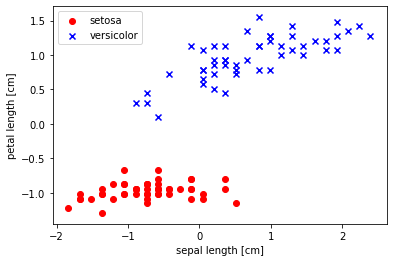

In [30]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)
X = df.iloc[0:100, [0, 2]].values

X_std = (X - X.mean(axis=0)) / X.std(axis=0)

plt.scatter(X_std[:50, 0], X_std[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X_std[50:, 0], X_std[50:, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

### logistic regression model

In [155]:
class LogisticRegression:
    def __init__(self, num_features):
        self.num_features = num_features
        self.random_gen = np.random.RandomState(1)
        
    def calc_z(self, x):
        z = np.dot(x, self.w[1:]) + self.w[0]
        return z
    
    def activation(self, z):
        """logistic sigmoid function"""
        phi_z = 1. / (1. + np.exp(-z))
        return phi_z
    
    def threshold(self, activation):
        return np.where(activation >= .5, 1, 0)
    
    def calc_batch_cost(self, X, y):
        z = self.calc_z(X)
        act = self.activation(z)
        pred = self.threshold(act)
        
        cost = -(y * np.log(act) + (1-y) * np.log(1 - act)).sum()        
        grad = np.dot((y - act), np.hstack([np.ones((X.shape[0], 1)), X]))
        return cost, grad, pred
    
    def fit(self, X, y, epochs, lr, lr_end_ratio=.5):
        self.w = self.random_gen.normal(0, 0.01, size=self.num_features+1)
        self._loss_history = []
        
        for epoch in range(epochs):
            epoch_lr = (1 - lr_end_ratio) * lr * (1 - epoch / (epochs-1)) + lr_end_ratio * lr
            cost, grad, _ = self.calc_batch_cost(X, y)
            self._loss_history.append(cost)
            
            d_w = epoch_lr * grad
            self.w += d_w
            
            print(f'epoch {epoch:02d} - cost: {cost:8.4f} / lr: {epoch_lr:.4f}')
            
        plt.plot(range(1, epochs+1), self._loss_history)
        plt.title('cost - negative log likelihood')
        plt.ylabel('cost')
        plt.xlabel('epochs')
        plt.show()
    
    def __call__(self, x):
        z = self.calc_z(x)
        pred = self.threshold(self.activation(z))
        return pred

epoch 00 - cost:  69.7984 / lr: 0.1000
epoch 01 - cost:   6.9505 / lr: 0.0964
epoch 02 - cost:   5.3410 / lr: 0.0929
epoch 03 - cost:   4.2281 / lr: 0.0893
epoch 04 - cost:   3.4659 / lr: 0.0857
epoch 05 - cost:   2.9393 / lr: 0.0821
epoch 06 - cost:   2.5672 / lr: 0.0786
epoch 07 - cost:   2.2969 / lr: 0.0750
epoch 08 - cost:   2.0947 / lr: 0.0714
epoch 09 - cost:   1.9392 / lr: 0.0679
epoch 10 - cost:   1.8166 / lr: 0.0643
epoch 11 - cost:   1.7180 / lr: 0.0607
epoch 12 - cost:   1.6372 / lr: 0.0571
epoch 13 - cost:   1.5701 / lr: 0.0536
epoch 14 - cost:   1.5136 / lr: 0.0500


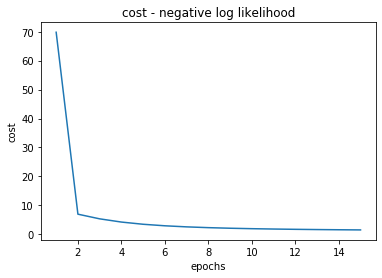

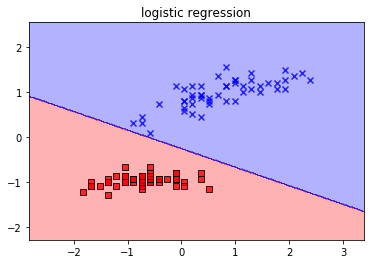

In [156]:
logi = LogisticRegression(2)
logi.fit(X_std, y, 15, 0.1, 0.5)

plot_decision_regions(X_std, y, logi, title='logistic regression')